# Exploratory Data Analysis (EDA) (Notebook 1_Week 3 Deliverable_Part2)

### Import libraries

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Loading clean Dataset

In [2]:
# Load the data
df = pd.read_csv('declarations-exterminations-punaises-de-lit-1.csv')

#### Verify Datatype and make modifications

In [3]:
print(df.dtypes)

NO_DECLARATION        int64
DATE_DECLARATION     object
DATE_PRIOR_INSP      object
EXT_FREQ            float64
DATE_FIRST_EXT       object
DATE_LAST_EXT        object
HOOD_NUM             object
HOOD_NAME            object
BORO_NAME            object
MTM8_X              float64
MTM8_Y              float64
LONGITUDE           float64
LATITUDE            float64
LONG_LAT             object
MTM_X_Y              object
DEC_MONTH             int64
DEC_ISSUE             int64
DATE_DIFF           float64
dtype: object


In [4]:
# Convert 'DATE_INSP_VISPRE', 'DATE_DEBUTTRAIT', and 'DATE_FINTRAIT'
df['DATE_PRIOR_INSP'] = pd.to_datetime(df['DATE_PRIOR_INSP'])
df['DATE_FIRST_EXT'] = pd.to_datetime(df['DATE_FIRST_EXT'])
df['DATE_LAST_EXT'] = pd.to_datetime(df['DATE_LAST_EXT'])
df['DATE_DECLARATION'] = pd.to_datetime(df['DATE_DECLARATION'])
print(df.dtypes)

NO_DECLARATION               int64
DATE_DECLARATION    datetime64[ns]
DATE_PRIOR_INSP     datetime64[ns]
EXT_FREQ                   float64
DATE_FIRST_EXT      datetime64[ns]
DATE_LAST_EXT       datetime64[ns]
HOOD_NUM                    object
HOOD_NAME                   object
BORO_NAME                   object
MTM8_X                     float64
MTM8_Y                     float64
LONGITUDE                  float64
LATITUDE                   float64
LONG_LAT                    object
MTM_X_Y                     object
DEC_MONTH                    int64
DEC_ISSUE                    int64
DATE_DIFF                  float64
dtype: object


#### Dataframe summary

In [5]:
#print(df.shape)

print('Bed bug extermination declarations')
print('')
print('==================COLUMNS==================')
print(df.columns)
print('')
print('==================HEAD==================')
print(df.head())
print('')
print('==================DESCRIBE==================')
print(df.describe())

Bed bug extermination declarations

==================COLUMNS==================
Index(['NO_DECLARATION', 'DATE_DECLARATION', 'DATE_PRIOR_INSP', 'EXT_FREQ',
       'DATE_FIRST_EXT', 'DATE_LAST_EXT', 'HOOD_NUM', 'HOOD_NAME', 'BORO_NAME',
       'MTM8_X', 'MTM8_Y', 'LONGITUDE', 'LATITUDE', 'LONG_LAT', 'MTM_X_Y',
       'DEC_MONTH', 'DEC_ISSUE', 'DATE_DIFF'],
      dtype='object')

==================HEAD==================
   NO_DECLARATION DATE_DECLARATION DATE_PRIOR_INSP  EXT_FREQ DATE_FIRST_EXT  \
0            4254       2012-10-28      2012-09-21      1.00     2012-09-21   
1             830       2011-09-16      2011-07-13      1.00     2011-07-27   
2            1380       2011-11-08      2011-11-02      1.00     2011-11-07   
3             455       2011-08-10      2011-08-09      1.00     2011-08-09   
4            1243       2011-10-26      2011-09-16      1.00     2011-10-05   

  DATE_LAST_EXT HOOD_NUM      HOOD_NAME                            BORO_NAME  \
0    2012-09-21       2

In [6]:
print('==================BORO_VALUE_COUNT==================')
print(df['BORO_NAME'].value_counts())
print('')
print('==================ANALYSIS==================')
print('max:',np.max(df['BORO_NAME'].value_counts()))
print('min:',np.min(df['BORO_NAME'].value_counts()))
print('sum:',np.sum(df['BORO_NAME'].value_counts()))
print('mean:',np.mean(df['BORO_NAME'].value_counts()))
print('mean:',np.round(np.mean(df['BORO_NAME'].value_counts()),2))
print('std:',np.std(df['BORO_NAME'].value_counts()))
print('std:',np.round(np.std(df['BORO_NAME'].value_counts()),2))
print('median:',np.median(df['BORO_NAME'].value_counts()))
print ('count:',df['BORO_NAME'].value_counts().count())

==================BORO_VALUE_COUNT==================
Rosemont–La Petite-Patrie                   4320
Villeray–Saint-Michel–Parc-Extension        4304
Mercier–Hochelaga-Maisonneuve               4036
Le Plateau-Mont-Royal                       3696
Ville-Marie                                 3347
Côte-des-Neiges–Notre-Dame-de-Grâce         2909
Ahuntsic-Cartierville                       2695
Montréal-Nord                               1754
Le Sud-Ouest                                1251
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME,

In [7]:
print('==================CORR==================')
print('Corr:',df.corr())

==================CORR==================
Corr:                 NO_DECLARATION  EXT_FREQ  MTM8_X  MTM8_Y  LONGITUDE  LATITUDE  \
NO_DECLARATION            1.00     -0.05   -0.05   -0.00      -0.05     -0.00   
EXT_FREQ                 -0.05      1.00    0.02    0.01       0.02      0.01   
MTM8_X                   -0.05      0.02    1.00    0.22       1.00      0.22   
MTM8_Y                   -0.00      0.01    0.22    1.00       0.22      1.00   
LONGITUDE                -0.05      0.02    1.00    0.22       1.00      0.22   
LATITUDE                 -0.00      0.01    0.22    1.00       0.22      1.00   
DEC_MONTH                 0.08     -0.05   -0.00    0.02      -0.00      0.02   
DEC_ISSUE                  nan       nan     nan     nan        nan       nan   
DATE_DIFF                 0.11     -0.03   -0.07    0.01      -0.07      0.01   

                DEC_MONTH  DEC_ISSUE  DATE_DIFF  
NO_DECLARATION       0.08        nan       0.11  
EXT_FREQ            -0.05        nan      

# Data Perspective
- One variable
    - Numeric variables
    - Categorical variables
Business Perspective

## One Variable (numeric)

==================DESCRIBE==================
count   33357.00
mean       37.00
std        79.00
min      -348.00
25%         6.00
50%        15.00
75%        39.00
max      3737.00
Name: DATE_DIFF, dtype: float64



C:\Users\outpost\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\outpost\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

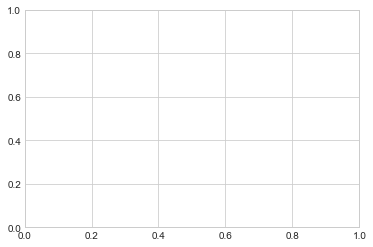

In [8]:
# Analyzing number of days between declaration and inspection

# Histogram
print('==================DESCRIBE==================')
print(df['DATE_DIFF'].describe().round())
print('')
plt.hist(df['DATE_DIFF'], bins=50)
plt.show()

# Box plot
#plt.boxplot(df['DEC_ISSUE'])
#plt.xticks([1], df['DEC_ISSUE'], rotation='horizontal')
#plt.show()

In [ ]:
#TODO: Analyze all the numerical variables

## One Variable (categorical)

==================TOP_10_BORO==================
Rosemont–La Petite-Patrie               4320
Villeray–Saint-Michel–Parc-Extension    4304
Mercier–Hochelaga-Maisonneuve           4036
Le Plateau-Mont-Royal                   3696
Ville-Marie                             3347
Côte-des-Neiges–Notre-Dame-de-Grâce     2909
Ahuntsic-Cartierville                   2695
Montréal-Nord                           1754
Le Sud-Ouest                            1251
Saint-Laurent                           1116
Name: BORO_NAME, dtype: int64



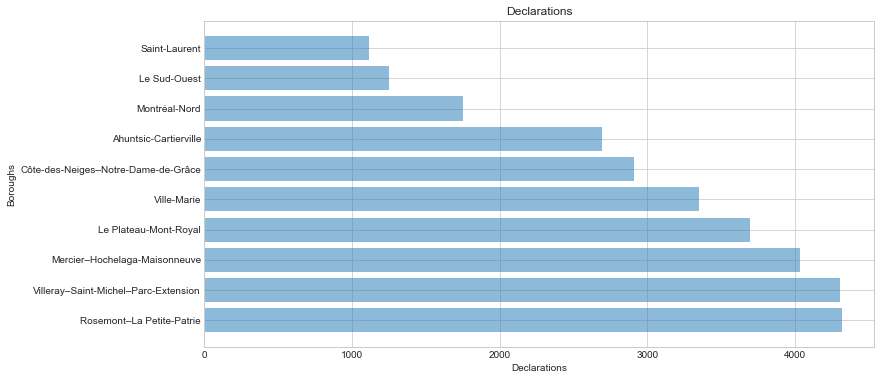

In [48]:
# Ref. : https://pythonspot.com/matplotlib-bar-chart/
# Ref. : https://python-graph-gallery.com/2-horizontal-barplot/

# Analyze by borough distribution with horizontal bar chart
print('==================TOP_10_BORO==================')
print(df['BORO_NAME'].value_counts().head(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Boroughs By Declaration')

labels = df['BORO_NAME'].value_counts().head(10).index
values = df['BORO_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.ylabel('Boroughs')
plt.xlabel('Declarations')


plt.show()

The top two boroughs with the highest declarations have a different of 20 declarations aparat. 
Also, georgraphiccally they border each other. Moreover, the top borough is geographically in between the next two boroughs, based declarations. The four highest is bordering on the second highest geographically.

The top four boroughts account for approximately 49% of total declarations.

In [10]:
#TODO: Analyze all the categorical variables

==================BOTTOM_10_BORO==================
Saint-Laurent                               1116
Saint-Léonard                                994
Verdun                                       782
Rivière-des-Prairies–Pointe-aux-Trembles     695
LaSalle                                      521
Lachine                                      361
Anjou                                        304
Outremont                                    145
Pierrefonds-Roxboro                          117
L'Île-Bizard–Sainte-Geneviève                 18
Name: BORO_NAME, dtype: int64



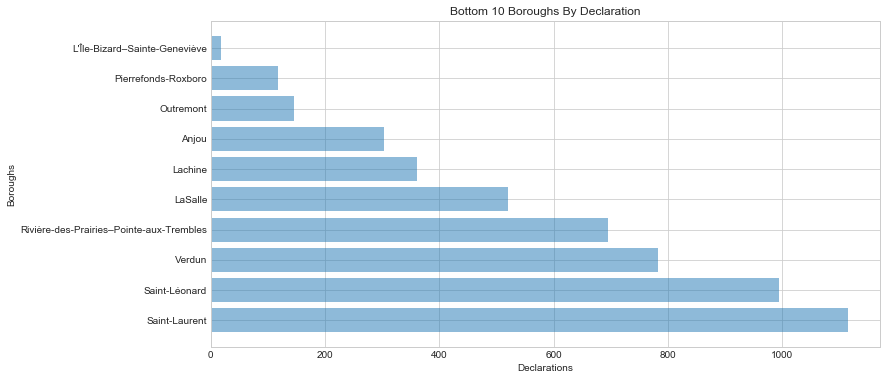

In [49]:
# Analyze borough distribution
print('==================BOTTOM_10_BORO==================')
print(df['BORO_NAME'].value_counts().tail(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Boroughs By Declaration')

labels = df['BORO_NAME'].value_counts().tail(10).index
values = df['BORO_NAME'].value_counts().tail(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.ylabel('Boroughs')
plt.xlabel('Declarations')

plt.show()


==================TOP_10_HOOD==================
Sainte-Marie      1730
Crémazie          1205
Parc-Extension    1171
Maisonneuve       1150
Lorimier           964
Vieux-Rosemont     938
Est                866
Père-Marquette     800
Cartierville       793
Montagne           792
Name: HOOD_NAME, dtype: int64



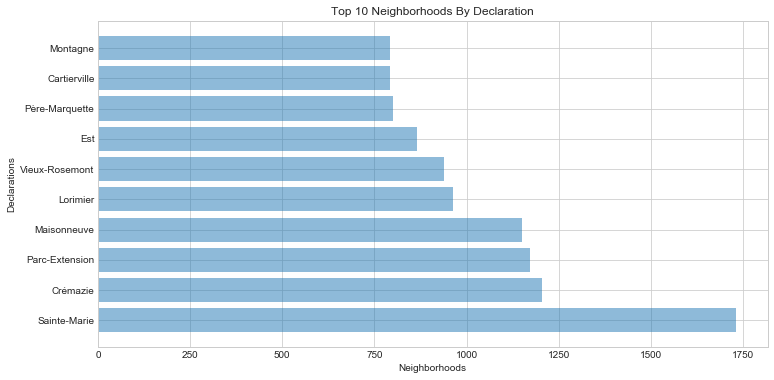

In [44]:
# Analyze Neighborhood distribution
print('==================TOP_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().head(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Top 10 Neighborhoods By Declaration')

plt.ylabel('Neighborhoods')
plt.xlabel('Declarations')

labels = df['HOOD_NAME'].value_counts().head(10).index
values = df['HOOD_NAME'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()

==================BOTTOM_10_HOOD==================
Ville-Émard                      89
Du College/Hodge                 79
Lachine-Ouest                    76
Dutrisac                         65
Guybourg                         64
Bois-Francs                      48
Rivière-des-Prairies             29
Pierrefonds-Ouest                21
Ile-des-Soeurs                   21
L'Île-Bizard–Sainte-Geneviève    18
Name: HOOD_NAME, dtype: int64



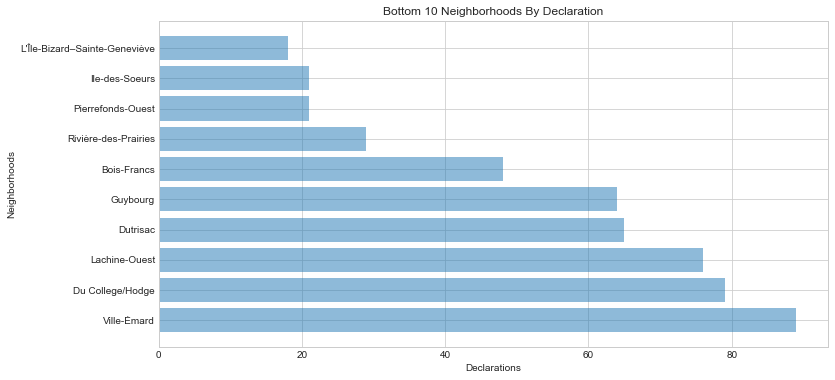

In [46]:
# Analyze Neighborhood distribution
print('==================BOTTOM_10_HOOD==================')
print(df['HOOD_NAME'].value_counts().tail(10))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Bottom 10 Neighborhoods By Declaration')

plt.ylabel('Neighborhoods')
plt.xlabel('Declarations')

labels = df['HOOD_NAME'].value_counts().tail(10).index
values = df['HOOD_NAME'].value_counts().tail(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()

==================DECLARATION_BY_MONTH_DESC==================
10    4022
9     3671
11    3379
7     3217
8     3202
12    2703
6     2552
2     2264
3     2186
5     2069
4     2069
1     2031
Name: DEC_MONTH, dtype: int64



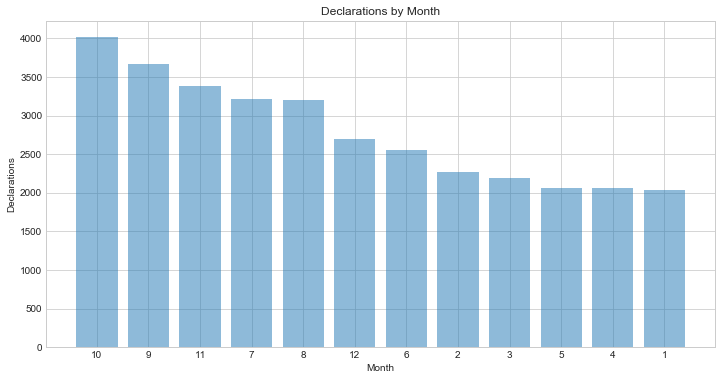

In [98]:
# Analyze Months distribution from declaration
print('==================DECLARATION_BY_MONTH_DESC==================')
print( (df['DEC_MONTH'].value_counts()) )
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by Month')

plt.xlabel('Month')
plt.ylabel('Declarations')

labels = df['DEC_MONTH'].value_counts().index
values = df['DEC_MONTH'].value_counts().values

y_pos = range(len(labels))

plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)

plt.show()

==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================
-73.571239_45.584338                     264
-73.659233_45.569024                     181
-73.620588_45.551456                     151
-73.582592_45.49409                      148
-73.68714399999999_45.518173             139
-73.58043_45.492816999999995             136
-73.60591600000001_45.428377000000005    116
-73.563652_45.528809                     114
-73.604952_45.58441                      107
-73.634049_45.504446                     101
-73.607061_45.58249                      100
-73.60306800000001_45.582456              96
Name: LONG_LAT, dtype: int64



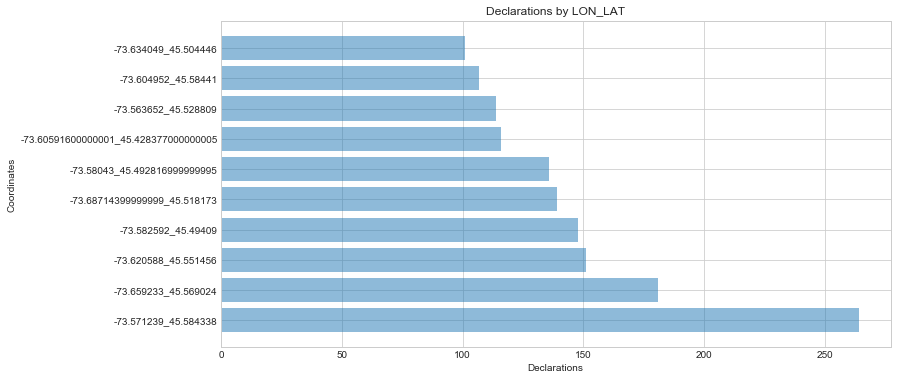

In [71]:
print('==================TOP_10_INTERSECTIONS_BASED_ON_LONG_LAT==================')
# Analyze Coordinates distribution from declaration
print(df['LONG_LAT'].value_counts().head(12))
print('')

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('Declarations by LON_LAT')

plt.ylabel('Coordinates')
plt.xlabel('Declarations')

labels = df['LONG_LAT'].value_counts().head(10).index
values = df['LONG_LAT'].value_counts().head(10).values

y_pos = range(len(labels))

plt.barh(y_pos, values, align='center', alpha=0.5)
plt.yticks(y_pos, labels)

plt.show()


## Correlation

In [17]:
# Correlation
df.corr()

,NO_DECLARATION,EXT_FREQ,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,DEC_MONTH,DEC_ISSUE,DATE_DIFF
NO_DECLARATION,1.00,-0.05,-0.05,-0.00,-0.05,-0.00,0.08,nan,0.11
EXT_FREQ,-0.05,1.00,0.02,0.01,0.02,0.01,-0.05,nan,-0.03
MTM8_X,-0.05,0.02,1.00,0.22,1.00,0.22,-0.00,nan,-0.07
MTM8_Y,-0.00,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.01
LONGITUDE,-0.05,0.02,1.00,0.22,1.00,0.22,-0.00,nan,-0.07
LATITUDE,-0.00,0.01,0.22,1.00,0.22,1.00,0.02,nan,0.01
DEC_MONTH,0.08,-0.05,-0.00,0.02,-0.00,0.02,1.00,nan,0.05
DEC_ISSUE,nan,nan,nan,nan,nan,nan,nan,nan,nan
DATE_DIFF,0.11,-0.03,-0.07,0.01,-0.07,0.01,0.05,nan,1.00


There is a strong correlation between MTM8_X and Longitude, and another strong relationship between MTM8_Y and Latitude. All other relationships are negligible.

# Business Perspective

## Data Persepective

## One Variable

### Categorical

There are a few categorical values that we can generate utilizing our data.  This would be counts based on neighborhood (NOM_QR), borough (NOM_ARROND), declaration date (DATE_DECLARATION) and intersection location (COORD_X x COORD_Y) for longitude and latitude.  This would give us different insights on the infestations declared in the various areas of the city. 

### Numerical

Based on the categorical values we generated above, we can then establish Min, Max, Mean values based on those Counts.  We can also generate Sums based on the number of visits by location or by time of year (based on declaration dates) to possibly gain insight on variables such as temperature or moving period (seasonal). 

## Multiple Variables

Multi variable statistics can also be generated based on our dataset to try and establish trends and gain further insight. Examples of such include:

-	Counts on borough (NOM_ARROND) and neighborhood (NOM_QR) by date of declaration
-	Number of days between DATE_INSP_VISPRE and DATE_DECLARATION. 
(Long waiting period can cause infestations to spread.)
-	Number of days between DATE_DECLARATION - DATE_DEBUTTRAIT
-	(Long waiting period can cause infestations to spread.)


# Business Persepective

### Descriptive Data Analysis

■ Descriptive Analytics
What happened? We know that there were exterminations at this location (intersection) in the past, sometimes frequently.
■ Diagnostic Analytics
Why it happened? History of exterminations nearby, where the bed bugs spread through clothing, humans, animals or other items unto uncontaminated items. With an incubation period, the spread may have been undetected for one to two weeks. 
Used clothing, used furniture, rental housing, and travel accommodation facilities are available nearby from locations where exterminations occurred.
(Environment Canada 2018)


### Diagnostic Data Analysis

Bedbugs can spread and infest an area in numerous ways.  Based on government reports we know infestations can spread by human contact (clothing), unsanitary environments, along with used furniture and mattresses to name a few.  This exercise in data mining has been undertaken to potentially uncover flash points, periods and/or locations that can possibly bring to light problematic scenarios that we can rectify and decrease, if not eliminate, future infestations.

1.	Number of days between Inspection/Declaration and Start-End of extermination.  
(Given a lengthy waiting period we could have a potential opportunity for spreading)  

2.	Identify the most problematic boroughs
(What is the difference between worst and best ranked)

3.	Identify the most problematic neighborhood
(What is the difference between worst and best ranked)

4.	Based on 2 and 3, is the issue borough wide or at neighborhood level? 
(Management issue)

5.	When was the declaration made?
(Is the problem based on a specific time of year? Heat? Moving period?)

6.	Is a problem more relevant to a particular block?
(COORD_X x COORD_Y)

7.	Nbr_Exterminations x COORD_X x COORD_Y x Nom_QR
(Can the issue be subject to extermination mismanagement?) 
